# Test of paraxial surface

11-23-2023

This turned out to be really easy. I did find a reference online to a method, but it seems complex. On the other hand, it did provide the valuable insight.

https://apps.dtic.mil/sti/pdfs/ADA428762.pdf

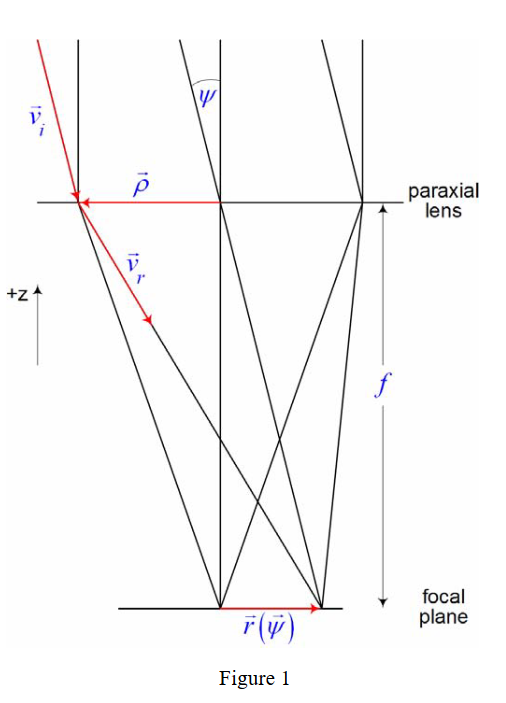

The definition of this thing called a "paraxial" lens, is that *all rays parallel to the chief ray pass through a single point in the focal plane*. Thus for each incoming ray, tracing through the paraxial can be done in the following steps:

0. Find the intersection of the incoming ray with the paraxial surface.

1. Find the chief ray. This is the ray parallel to the incoming ray, but passing through the center of the surface.

2. Trace the chief ray by a distance equal to the focal length of the surface, to the focal point. The incoming ray will also pass through this focal point.

3. The outgoing ray vector is the vector pointing from the intersection to the focal point.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import opticsRayTrace.rayTraceTools as rtt
import opticsRayTrace.drawing as rtd

Text(0.5, 1.0, 'Test of paraxial surface')

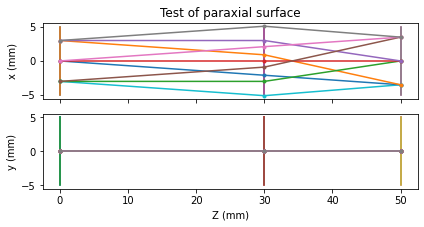

In [2]:
working_distance = 30

surface_list_1 = [
    {
        "surf": "dummy", 
        "dist": working_distance, 
        "draw_radius": 5
    },
    {
        "surf": "paraxial",
        "f": 20,
        "dist": 20,
        "draw_radius": 5
    },
    {
        "surf": "dummy", 
        "draw_radius": 5
    }
]

geometry_1 = rtt.build_geometry(surface_list_1)

# Create a single field point

lsf = np.linspace(-4, 4, 3)
lsp = np.linspace(-3, 3, 3)
field_rays = np.array([np.array([np.sin(x*np.pi/180), 0, np.cos(x*np.pi/180)]) for x in lsf])
pupil_points = np.array([np.array([x, 0, 0]) for x in lsp])
wavelengths = np.array([0.000633])

ray_table_1 = rtt.new_ray_table(geometry_1, field_rays, pupil_points, wavelengths, infinite = True)
rtt.trace_rays(ray_table_1, geometry_1)
axd = rtd.new_plot()
rtd.plot_faces(axd, geometry_1)
rtd.plot_rays(axd, geometry_1, ray_table_1, marker = '.')
axd["axs"][0].set_title("Test of paraxial surface")